In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten,Dense,Conv2D,MaxPooling2D,Dropout
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam

C:\Users\HP\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
(x_train,y_train),(x_test,y_test)=fashion_mnist.load_data()
x_train.shape

(60000, 28, 28)

In [3]:
x_test.shape

(10000, 28, 28)

In [4]:
x_train[0].shape

(28, 28)

In [5]:
classes={0:'Tshirt/top',
        1:'Trouser',
        2:'Pullover',
        3:'Dress',
        4:'Coat',
        5:'Sandal',
        6:'Shirt',
        7:'Sneaker',
        8:'Bag',
        9:'Ankle boot'}

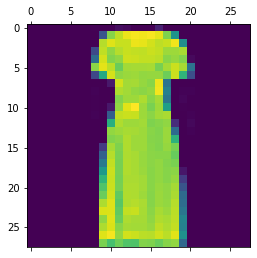

In [6]:
plt.matshow(x_train[50])

In [7]:
classes[y_train[50]]

'Dress'

In [8]:
#(batch_size,rows,columns,channels)
x_train=x_train.reshape((x_train.shape[0],x_train.shape[1],
                        x_train.shape[2],1))
# x_train =x_train.reshape(60000,28,28,1)
x_test=x_test.reshape((x_test.shape[0],x_test.shape[1],
                      x_test.shape[2],1))
# x_test=x_test.reshape((10000,28,28,1))
x_train.shape

(60000, 28, 28, 1)

In [9]:
# flatten layer is used to convert it into 1D
# padding=same means padding applied
model =Sequential()
model.add(Conv2D(32,(3,3),input_shape=(28,28,1),strides=(2,2),padding ='same',
                                                        activation='relu')) #padding='valid'
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(Flatten())
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax'))


C:\Users\HP\anaconda3\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [19]:
model.compile(loss='sparse_categorical_crossentropy',optimizer=Adam(),
             metrics=['accuracy'])

In [20]:
trained_history = model.fit(x_train,y_train,batch_size=1000,epochs=50,
                           validation_data=(x_test,y_test))

Epoch 1/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.8761 - loss: 0.3385 - val_accuracy: 0.8885 - val_loss: 0.3134
Epoch 2/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - accuracy: 0.8839 - loss: 0.3128 - val_accuracy: 0.8911 - val_loss: 0.3076
Epoch 3/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - accuracy: 0.8863 - loss: 0.3133 - val_accuracy: 0.8902 - val_loss: 0.3043
Epoch 4/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - accuracy: 0.8887 - loss: 0.3056 - val_accuracy: 0.8928 - val_loss: 0.3001
Epoch 5/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - accuracy: 0.8908 - loss: 0.3019 - val_accuracy: 0.8917 - val_loss: 0.3082
Epoch 6/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - accuracy: 0.8899 - loss: 0.2982 - val_accuracy: 0.8914 - val_loss: 0.3018
Epoch 7/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - accuracy: 0.8897 - loss: 0.3035 - val_accuracy: 0.8937 - val_loss: 0.3015
Epoch 8/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - accuracy: 0.8918 - loss: 0.2932 - val_accuracy: 0.8943 - v

In [23]:
hist=trained_history.history

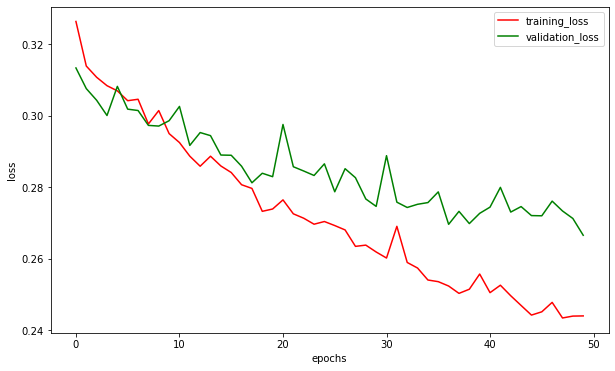

In [24]:
plt.figure(figsize=(10, 6)) 
plt.plot(hist['loss'],label='training_loss',color='red')
plt.plot(hist['val_loss'],label='validation_loss',color='green')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

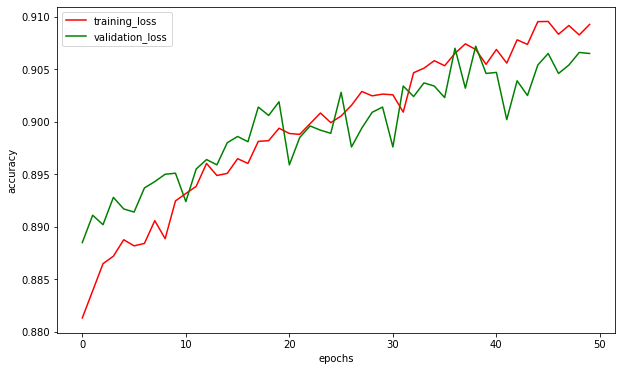

In [25]:
plt.figure(figsize=(10, 6)) 
plt.plot(hist['accuracy'],label='training_loss',color='red')
plt.plot(hist['val_accuracy'],label='validation_loss',color='green')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

### Prediction

In [27]:
import numpy as np
def predict(index):
    plt.imshow(x_test[index])
    pred_image =x_test[index].reshape(1,28,28,1)
    pred_prob = model.predict(pred_image)
    pred_class = np.argmax(pred_prob)
    print("Original class:",classes[y_test[index]])
    print("Predicted class:",classes[pred_class])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Original class: Trouser
Predicted class: Trouser


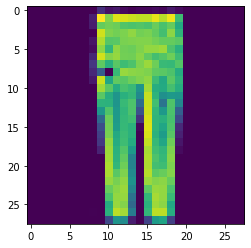

In [30]:
predict(200)